In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

#Loading data
data = load_breast_cancer()
X, y = data.data, data.target

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

#Training Logistic Regression model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

#predicting
y_pred = model.predict(X_test)

#Evaluation
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix: ", confusion_matrix(y_test, y_pred))
print("\nClassification Report: ", classification_report(y_test, y_pred))


Accuracy:  0.9649122807017544

Confusion Matrix:  [[39  3]
 [ 1 71]]

Classification Report:                precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114




--- Threshold = 0.30 ---
Precision: 0.893   Recall: 0.990   F1: 0.939
Confusion matrix (rows=true, cols=pred):
 [[136  34]
 [  3 283]]
Classification report:
               precision    recall  f1-score   support

           0      0.978     0.800     0.880       170
           1      0.893     0.990     0.939       286

    accuracy                          0.919       456
   macro avg      0.936     0.895     0.909       456
weighted avg      0.925     0.919     0.917       456


--- Threshold = 0.50 ---
Precision: 0.913   Recall: 0.986   F1: 0.948
Confusion matrix (rows=true, cols=pred):
 [[143  27]
 [  4 282]]
Classification report:
               precision    recall  f1-score   support

           0      0.973     0.841     0.902       170
           1      0.913     0.986     0.948       286

    accuracy                          0.932       456
   macro avg      0.943     0.914     0.925       456
weighted avg      0.935     0.932     0.931       456


--- Threshold = 0.70 ---


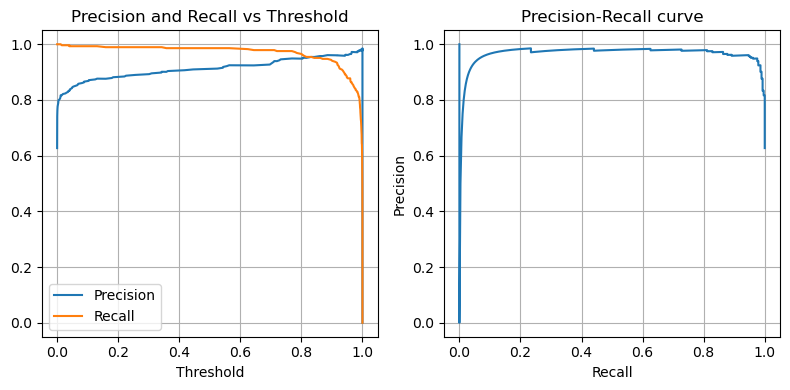

In [12]:
# --- Threshold experiments: precision / recall / confusion matrices ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (precision_score, recall_score, f1_score,
                             confusion_matrix, precision_recall_curve,
                             classification_report)

# get predicted probabilities for the positive class (class 1 = malignant)
probs = model.predict_proba(X_test)[:, 1]

# thresholds to inspect
thresholds = [0.3, 0.5, 0.7]

results = []
for t in thresholds:
    preds_t = (probs >= t).astype(int)
    prec = precision_score(y_test, preds_t)
    rec = recall_score(y_test, preds_t)
    f1 = f1_score(y_test, preds_t)
    cm = confusion_matrix(y_test, preds_t)
    results.append((t, prec, rec, f1, cm))
    print(f"\n--- Threshold = {t:.2f} ---")
    print(f"Precision: {prec:.3f}   Recall: {rec:.3f}   F1: {f1:.3f}")
    print("Confusion matrix (rows=true, cols=pred):\n", cm)
    print("Classification report:\n", classification_report(y_test, preds_t, digits=3))

# --- Precision-Recall curve and threshold plot ---
precisions, recalls, pr_thresholds = precision_recall_curve(y_test, probs)

# pr_thresholds has length len(precisions)-1; align for plotting:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(pr_thresholds, precisions[:-1], label="Precision")
plt.plot(pr_thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve")
plt.grid(True)

plt.tight_layout()
plt.show()


 1  mean recall = 0.951     std recall = 0.017
 3  mean recall = 0.958     std recall = 0.026
 5  mean recall = 0.961     std recall = 0.030
 7  mean recall = 0.965     std recall = 0.016
 9  mean recall = 0.965     std recall = 0.019
11  mean recall = 0.972     std recall = 0.021
13  mean recall = 0.972     std recall = 0.024
15  mean recall = 0.975     std recall = 0.021
17  mean recall = 0.975     std recall = 0.021
19  mean recall = 0.975     std recall = 0.021
21  mean recall = 0.975     std recall = 0.021
23  mean recall = 0.975     std recall = 0.021
25  mean recall = 0.975     std recall = 0.021
27  mean recall = 0.972     std recall = 0.026
29  mean recall = 0.972     std recall = 0.026


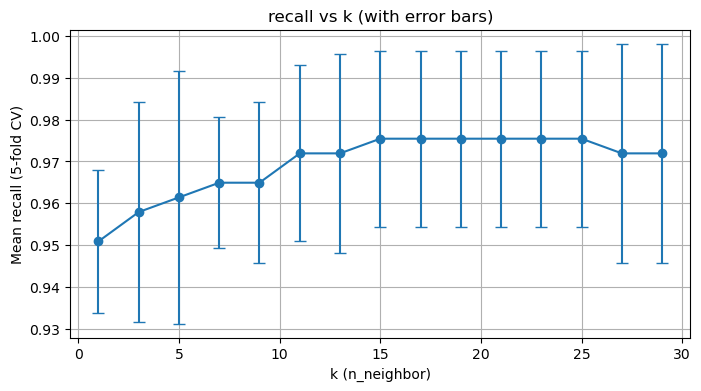


Best k by mean recall = 15 (mean recall = 0.975)

Test set results with best k:
Recall on test set: 0.9583333333333334
Confusion matrix:
 [[37  5]
 [ 3 69]]

Classification report:
               precision    recall  f1-score   support

           0      0.925     0.881     0.902        42
           1      0.932     0.958     0.945        72

    accuracy                          0.930       114
   macro avg      0.929     0.920     0.924       114
weighted avg      0.930     0.930     0.929       114



In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, classification_report, confusion_matrix

#load data
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42, stratify=y)

#setting up cross validation
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state=42)

k_values = list(range(1, 30, 2))

mean_recalls = []
std_recalls = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    #cross-validation score to return recall for each fold
    scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring="recall", n_jobs = -1)
    mean_recalls.append(scores.mean())
    std_recalls.append(scores.std())
    print(f"{k:2d}  mean recall = {scores.mean():.3f}     std recall = {scores.std():.3f}")

#plot recall vs k
plt.figure(figsize=(8,4))
plt.errorbar(k_values, mean_recalls, yerr=std_recalls, marker='o', capsize = 4)
plt.xlabel("k (n_neighbor)")
plt.ylabel("Mean recall (5-fold CV)")
plt.title("recall vs k (with error bars)")
plt.grid(True)
plt.show()

#finding the best k
best_idx = int(np.argmax(mean_recalls))
best_k = k_values[best_idx]

print(f"\nBest k by mean recall = {best_k} (mean recall = {mean_recalls[best_idx]:.3f})")

final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
y_pred_final = final_knn.predict(X_test)

#Metrics
print("\nTest set results with best k:")
print("Recall on test set:", recall_score(y_test, y_pred_test))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification report:\n", classification_report(y_test, y_pred_test, digits=3))

